In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [21]:
import boto3
from io import BytesIO
from fastparquet import ParquetFile

s3 = boto3.client("s3")
obj = s3.get_object(Bucket='covid-19-prj', Key='raw/trends/google_trends.parquet')
df = obj['Body'].read()
df = ParquetFile(BytesIO(df)).to_pandas()

## Overview

In [22]:
df.head()

,Date,Medicamento,Vacina,Sintoma,Respirador
index,,,,,
0,2018-01-07,51,36,19,4
1,2018-01-14,48,100,26,3
2,2018-01-21,51,62,24,3
3,2018-01-28,53,40,21,2
4,2018-02-04,54,27,22,3


In [23]:
df.describe()

,Medicamento,Vacina,Sintoma,Respirador
count,123.000000,123.000000,123.000000,123.000000
mean,61.373984,20.829268,25.902439,7.048780
std,7.775960,15.340778,12.921208,15.306087
min,48.000000,8.000000,17.000000,2.000000
25%,57.000000,13.000000,21.000000,3.000000
50%,61.000000,17.000000,23.000000,3.000000
75%,65.000000,22.500000,25.000000,4.000000
max,100.000000,100.000000,100.000000,100.000000


In [24]:
df.dtypes

Date           object
Medicamento     int64
Vacina          int64
Sintoma         int64
Respirador      int64
dtype: object

In [25]:
# Take a look at the date type
np.array([isinstance(x, str) for x in df.Date]).all()

True

In [27]:
# Unify the date column format
df['Date'] = pd.to_datetime(df.Date).dt.date
# Sort dates
df = df.sort_values('Date')

## EDA

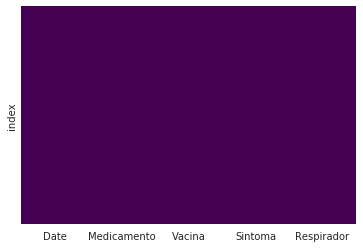

In [28]:
# Missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
# For more details
display(df.isnull().sum().sort_values(ascending=False))

Respirador     0
Sintoma        0
Vacina         0
Medicamento    0
Date           0
dtype: int64

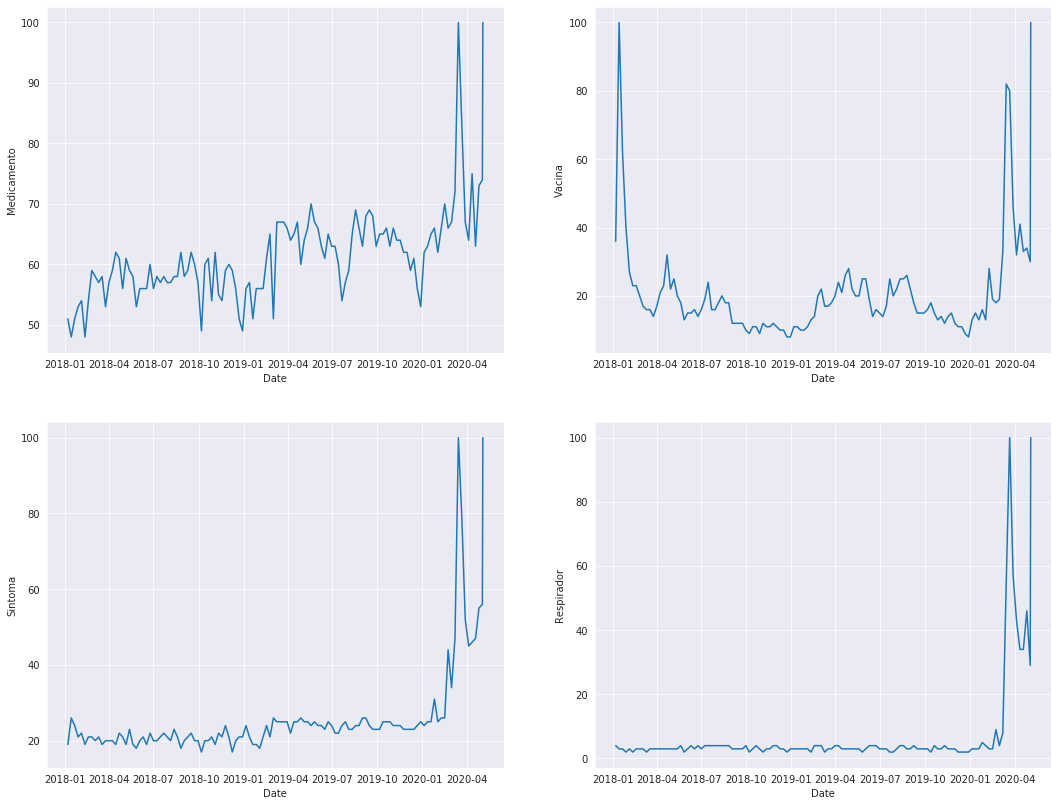

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,14))

for i, ax in enumerate(axes.flatten()):
    sns.lineplot(x='Date', y=df.columns[i+1], data=df, ax=ax)